<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p026_Preprocessing_Text_Easy_Way.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.2


reference : https://www.tensorflow.org/tutorials/load_data/text?hl=en

In [2]:
pip install "tensorflow-text==2.8.*"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 23.0 MB/s 


In [3]:
import collections
import pathlib

import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import utils
from tensorflow.keras.layers import TextVectorization

import tensorflow_datasets as tfds
import tensorflow_text as tf_text


 # Récupération des données

 * `data_url = 'https://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz'`
 * `'stack_overflow'`
 * `dataset_dir = pathlib.Path(dataset_dir).parent`

# Création du dataset
 * Utiliser `utils.text_dataset_from_directory()` pour créer un tensorflow dataset
 * Parcourir le dataset en affichant quelques exemples via `.take()` method afficher les features et le label
 * le codage des labels est disponible via l'attribut `raw_train_ds.class_names`
 * Créer les deux datasets training et validation en réglant l'argument `subset=`


In [ ]:
raw_train_ds = utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)


raw_val_ds = utils.text_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

# Tokenization
 * `tf.keras.layers.TextVectorization()`
 * vocab_size = 10000 (max_tokens)
 * output_mode = 'int'
 * output_sequence_length = 250
 * création du dataset text en removant les labels via `.map()` method afin de pouvoir runner l'adapt du text vectorizer layer
 * Créer une fonction qui affiche la version tokenisée et binarisée d'une séquence
 * avec la fonction map appliquer les transformateurs fonctions sur les datasets

# Le model pour données binaires
 * Seulement une couche avec 4 units pour les 4 classes qui suit le texte tokenisé pour les données binaires
 * loss = sparse categorical cross entropy
 * optimizer = 'adam'
 * metrics = 'accuracy'
 * epochs = 10


# Le model pour données tokens entiers
 * `layers.Embedding(vocab_size, 64, mask_zero=True)`
 * `layers.Conv1D(64, 5, padding="valid", activation="relu", strides=2)`
 * `layers.GlobalMaxPooling1D()`
 * `layers.Dense(num_labels)`

### Le Conv1D en schéma

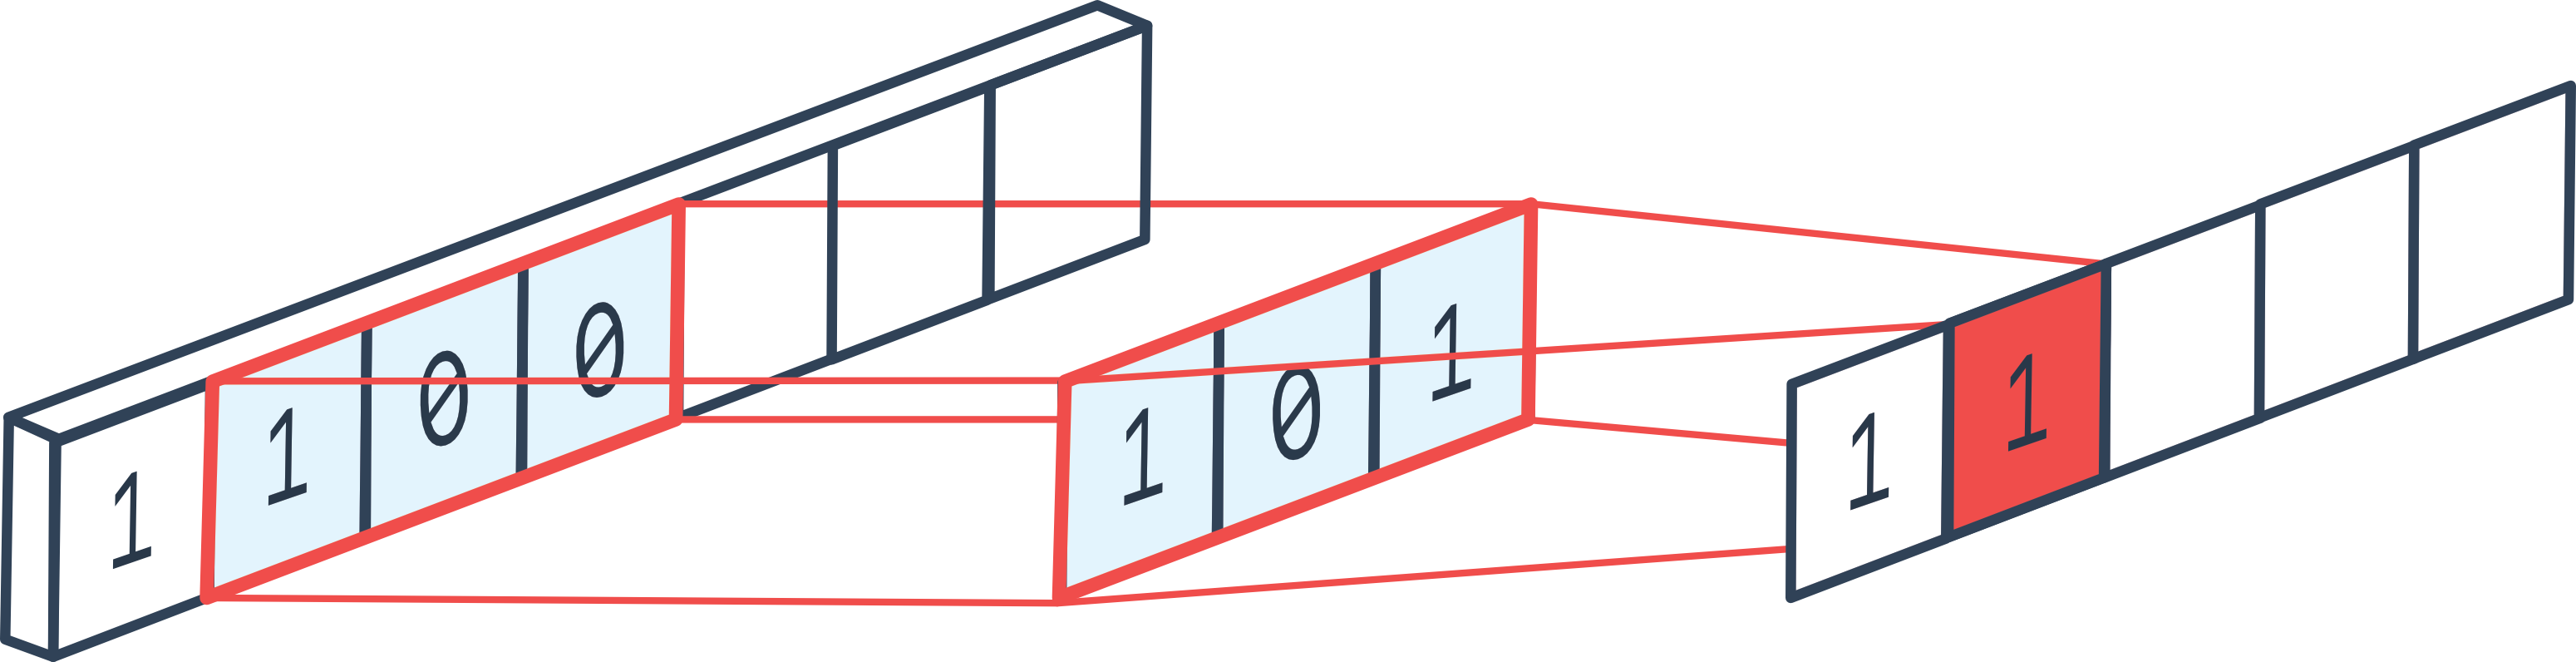

 * `kernel_size` = la taille de la fenêtre de convolution
 * `filters` = en gros c'est le nombre de coefficient pour un carreau

# Compile(), Fit(), Inference
 * Créer un modèle d'inférence pour le tester sur des custom strings, rajoutez la fonction d'activation en sigmoid. Compiler et fitter le modele
 * Créer une fonction d'inférence, qui prend en input batch de strings, et renvoie la classe la plus probable avec la probabilité